In [64]:
import pandas as pd
from datetime import datetime
%matplotlib inline

In [65]:
path = "COVID19VaccDosesAdministered.csv"

In [66]:
df_impf1 = pd.read_csv(path)

In [67]:
df_impf1[df_impf1["geoRegion"] == "ZH"].tail(10)

,date,geoRegion,entries,pop,sumTotal,per100Persons,per100Persons_mean7d,per100PersonsTotal,mean7d,type,version,granularity
4240,2021-05-31,ZH,18152.0,1539275,835441,1.18,1.04,54.27,15966.43,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4241,2021-06-01,ZH,21110.0,1539275,856551,1.37,1.06,55.65,16377.14,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4242,2021-06-02,ZH,22319.0,1539275,878870,1.45,1.18,57.10,18132.29,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4243,2021-06-03,ZH,23569.0,1539275,902439,1.53,1.18,58.63,18151.00,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4244,2021-06-04,ZH,23071.0,1539275,925510,1.50,1.22,60.13,18809.14,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4245,2021-06-05,ZH,18147.0,1539275,943657,1.18,1.25,61.31,19235.86,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4246,2021-06-06,ZH,689.0,1539275,944346,0.04,1.26,61.35,19437.00,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4247,2021-06-07,ZH,22759.0,1539275,967105,1.48,NaN,62.83,NaN,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4248,2021-06-08,ZH,24097.0,1539275,991202,1.57,NaN,64.39,NaN,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed
4249,2021-06-09,ZH,23727.0,1539275,1014929,1.54,NaN,65.94,NaN,COVID19VaccDosesAdministered,2021-06-11_09-30-57,detailed


In [68]:
# Datumszeile von Text in Datum umwandeln
df_impf1["date"] = pd.to_datetime((df_impf1["date"]), format='%Y-%m-%d')

## Datumsbereich festlegen

In [69]:
start = input("Startdatum wie folgt eingeben: yyyy-mm-dd ")
ende = input("Enddatum wie folgt eingeben: yyyy-mm-dd ")

start = pd.to_datetime(start, format='%Y-%m-%d')
ende = pd.to_datetime(ende, format='%Y-%m-%d')

Startdatum wie folgt eingeben: yyyy-mm-dd 2021-05-01
Enddatum wie folgt eingeben: yyyy-mm-dd 2021-06-15


In [70]:
df_Mai = df_impf1[(df_impf1["date"] >= start) & (df_impf1["date"] <= ende)]

In [71]:
#grosse Kantone rausfiltern
df_MaiGross = df_Mai[(df_Mai["geoRegion"] == "ZH") | (df_Mai["geoRegion"] == "BE") | (df_Mai["geoRegion"] == "VD")] 

In [72]:
df_Mai.columns

Index(['date', 'geoRegion', 'entries', 'pop', 'sumTotal', 'per100Persons',
       'per100Persons_mean7d', 'per100PersonsTotal', 'mean7d', 'type',
       'version', 'granularity'],
      dtype='object')

In [73]:
# weglöschen der unnötigen Zahlen
df_MaiGross = df_MaiGross.drop(['mean7d', 'type', 'version', 'granularity'], axis = 1)

In [74]:
df_MaiGross.head(3)

,date,geoRegion,entries,pop,sumTotal,per100Persons,per100Persons_mean7d,per100PersonsTotal
640,2021-05-01,BE,5541.0,1039474,349060,0.53,0.80,33.58
641,2021-05-02,BE,1258.0,1039474,350318,0.12,0.83,33.70
642,2021-05-03,BE,9832.0,1039474,360150,0.95,0.86,34.65


In [75]:
df_pivot = df_MaiGross.pivot(index='date', columns='geoRegion', values='per100Persons')
df_pivot.head(3)

geoRegion,BE,VD,ZH
date,,,
2021-05-01,0.53,0.36,0.14
2021-05-02,0.12,0.19,0.00
2021-05-03,0.95,0.81,0.76


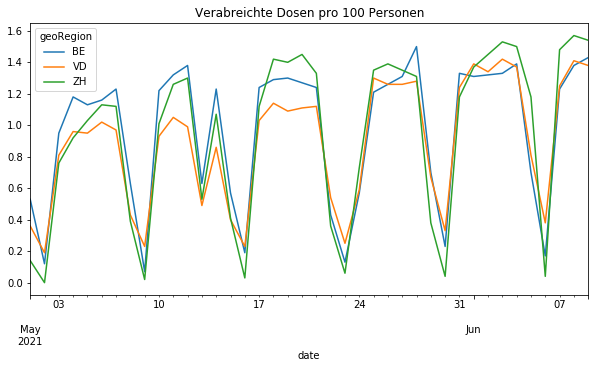

In [76]:
df_pivot.plot(figsize = (10,5), title='Verabreichte Dosen pro 100 Personen')


In [77]:
#Exportieren Excel
df_pivot.to_excel("impfungen_taeglich.xlsx") 

### Und noch das Gleiche mit dem 7-Tages-Mittel

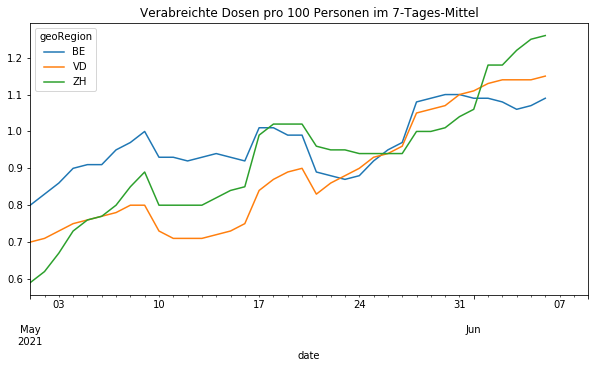

In [78]:
df_pivot_mean = df_MaiGross.pivot(index='date', columns='geoRegion', values='per100Persons_mean7d')
df_pivot_mean.plot(figsize = (10,5), title='Verabreichte Dosen pro 100 Personen im 7-Tages-Mittel')

In [38]:
#Exportieren Excel
df_pivot_mean.to_excel("impfungen.xlsx") 

## Noch ein Versuch nur mit den Erstimpfungen

In [39]:
path1 = "COVID19VaccDosesAdministered.csv"
path2 = "COVID19FullyVaccPersons.csv"

df_impf = pd.read_csv(path1)
df_fully = pd.read_csv(path2)

# Datumszeilen von Text in Datum umwandeln
df_impf["date"] = pd.to_datetime((df_impf["date"]), format='%Y-%m-%d')
df_fully["date"] = pd.to_datetime((df_fully["date"]), format='%Y-%m-%d')

In [40]:
#rausfiltern der gewünschten Daten
df_filtered_impf = df_impf[(df_impf["date"] >= start) & (df_impf["date"] <= ende)]
#rausfiltern der gewünschten Kantone
df_filtered_impf = df_filtered_impf[(df_filtered_impf["geoRegion"] == "ZH") | (df_filtered_impf["geoRegion"] == "BE") | (df_filtered_impf["geoRegion"] == "VD")] 
#löschen der nicht benötigten Spalten
df_filtered_impf = df_filtered_impf.drop(['entries', 'pop', 'sumTotal', 'per100PersonsTotal', 'mean7d', 'type',
       'version', 'granularity'], axis = 1)
#umbenennen der Kolumnen, damits beim concat keine Doppelungen gibt
df_filtered_impf.rename(columns={'per100Persons': 'impfper100', "per100Persons_mean7d": "impfper100mean"}, inplace = True)
df_filtered_impf.head(5)

,date,geoRegion,impfper100,impfper100mean
640,2021-05-01,BE,0.53,0.80
641,2021-05-02,BE,0.12,0.83
642,2021-05-03,BE,0.95,0.86
643,2021-05-04,BE,1.18,0.90
644,2021-05-05,BE,1.13,0.91


In [41]:
df_filtered_fully =  df_fully[(df_fully["date"] >= start) & (df_fully["date"] <= ende)]
df_filtered_fully = df_filtered_fully[(df_filtered_fully["geoRegion"] == "ZH") | (df_filtered_fully["geoRegion"] == "BE") | (df_filtered_fully["geoRegion"] == "VD")] 
df_filtered_fully = df_filtered_fully.drop(['entries', 'pop', 'sumTotal', 'per100PersonsTotal', 'mean7d', 'type',
       'version', 'granularity'], axis = 1)
df_filtered_fully.rename(columns={'per100Persons': '2teper100', "per100Persons_mean7d": "2teper100mean"}, inplace = True)
df_filtered_fully.head(3)

,date,geoRegion,2teper100,2teper100mean
640,2021-05-01,BE,0.03,0.16
641,2021-05-02,BE,0.00,0.17
642,2021-05-03,BE,0.09,0.17


In [42]:
df_erstimpfungen = pd.concat([df_filtered_impf, df_filtered_fully["2teper100"]], axis=1, join="outer")
df_erstimpfungen["1teper100"] = df_erstimpfungen["impfper100"] - df_erstimpfungen["2teper100"]
df_erstimpfungen.head(3)

,date,geoRegion,impfper100,impfper100mean,2teper100,1teper100
640,2021-05-01,BE,0.53,0.80,0.03,0.50
641,2021-05-02,BE,0.12,0.83,0.00,0.12
642,2021-05-03,BE,0.95,0.86,0.09,0.86


In [43]:
df_pivot2 = df_erstimpfungen.pivot(index='date', columns='geoRegion', values='1teper100')
df_pivot2.head(3)

geoRegion,BE,VD,ZH
date,,,
2021-05-01,0.50,0.36,0.14
2021-05-02,0.12,0.19,0.00
2021-05-03,0.86,0.67,0.70


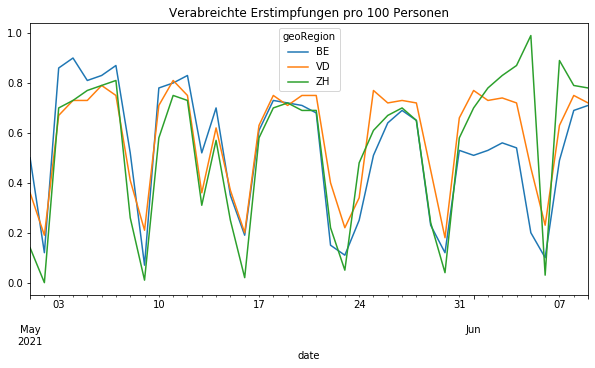

In [44]:
df_pivot2.plot(figsize = (10,5), title='Verabreichte Erstimpfungen pro 100 Personen')

### Und auch hier noch das Gleiche im 7-Tages-Mittel

In [45]:
df_erstimpfungen_7 = pd.concat([df_filtered_impf, df_filtered_fully["2teper100mean"]], axis=1, join="outer")
df_erstimpfungen_7["1teper100mean"] = df_erstimpfungen_7["impfper100mean"] - df_erstimpfungen_7["2teper100mean"]

df_erstimpfungen_7.head(3)

,date,geoRegion,impfper100,impfper100mean,2teper100mean,1teper100mean
640,2021-05-01,BE,0.53,0.80,0.16,0.64
641,2021-05-02,BE,0.12,0.83,0.17,0.66
642,2021-05-03,BE,0.95,0.86,0.17,0.69


In [46]:
df_pivot2mean = df_erstimpfungen_7.pivot(index='date', columns='geoRegion', values='1teper100mean')
df_pivot2mean.head(3)

geoRegion,BE,VD,ZH
date,,,
2021-05-01,0.64,0.58,0.51
2021-05-02,0.66,0.58,0.52
2021-05-03,0.69,0.59,0.54


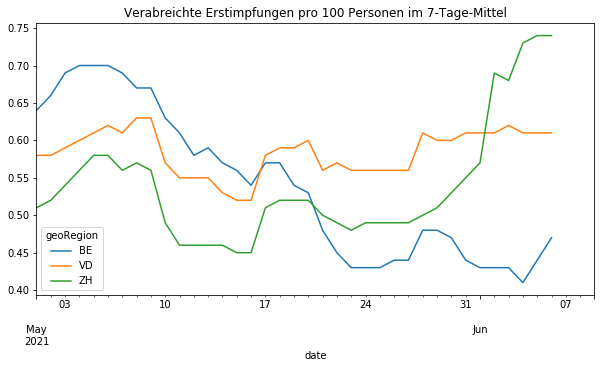

In [47]:
df_pivot2mean.plot(figsize = (10,5), title='Verabreichte Erstimpfungen pro 100 Personen im 7-Tage-Mittel')

In [48]:
#Exportieren Excel
df_pivot2mean.to_excel("1stimpfungen.xlsx") 